# Dataset comparison with Hundred Hammers

In this notebook, the goal is to compare the performance of different datasets across different models. Although at first sight it might seem strange to discuss dataset comparison, it is actually quite common: every time we do feature selection for example, we are effectively searching for better datasets. 

In this notebook, we will show how this can be easily done using Hundred Hammers.

In [1]:
import numpy as np
import pandas as pd
import logging
from sklearn.datasets import load_iris

import hundred_hammers as hh
from hundred_hammers import HundredHammersClassifier
from hundred_hammers.plots import plot_multiple_datasets

First, we will load a base dataset, and store it as the traditional (X, y) tuple.

In [2]:
data = load_iris()
X, y = data.data, data.target

Then, we will create a simple HH model for classification.

In [3]:
hh.hh_logger.setLevel(logging.WARNING)
hh = HundredHammersClassifier()

Now, for every $i$-th feature, we will create a $X_i$ dataset that does not have it. We will also power every value in this dataset to the $j$-th degree, so we can toy with another dimension.

Every result dataframe produced will be stored in an array `df`, after adding a column named "Dataset".

In [4]:
df = []
for i, feature_name in enumerate(data.feature_names):
    X_i = X[:, [j for j in range(X.shape[1]) if j != i]]

    for j in range(8):
        df_i = hh.evaluate(X_i ** j, y, optim_hyper=False)
        df_i["Dataset"] = f"$X^{j}$, w/out $x_{i}$"
        df.append(df_i)

Now we will consolidate all result dataframes in a single object, which we will use for plotting. 

In [6]:
df_results = pd.concat(df, ignore_index=True)

Now we will plot the results comparison using the in-built `plot_multiple_datasets`. This function needs three key components: 

1. `df`: the DataFrame with all results
2. `metric_name`: the column name to be compared
3. `id_col`: the column that contains the ID of every dataset.

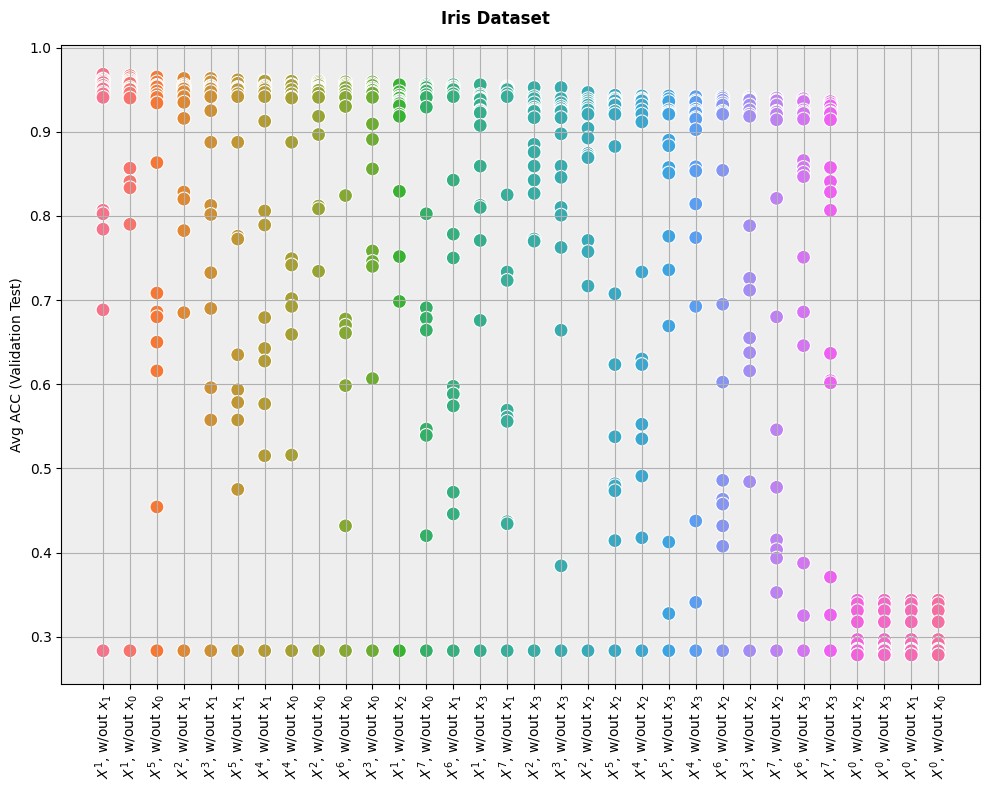

In [7]:
plot_multiple_datasets(df=df_results, metric_name="Avg ACC (Validation Test)", id_col="Dataset", title="Iris Dataset", display=True)

As we can see, the results are very intuitive: performance is best when the dataset is left unchanged ($X^1$), and it is worse when we power the attributes to the $0$-th degree (effectively reducing every feature to the constant $1$). 

The plot does not make it easy to know which models are the best for each dataset, but it is easy to see which datasets are the best for models overall.